Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

In [3]:
df = pd.read_csv("/Users/kunalyeole/Development/Python_codes/UberDrives/My_Uber_Drives .csv") 

In [4]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

Checking Missing Values

In [7]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [12]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [13]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')

/var/folders/xr/y3y6zb6d2q9__zn0xltd5lvh0000gn/T/ipykernel_7680/1824376877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format = '%m/%d/%Y %H:%M')
/var/folders/xr/y3y6zb6d2q9__zn0xltd5lvh0000gn/T/ipykernel_7680/1824376877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')


In [14]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR'] = hour
df['DAY'] = day
df['DAY OF WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

/var/folders/xr/y3y6zb6d2q9__zn0xltd5lvh0000gn/T/ipykernel_7680/227142831.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = hour
/var/folders/xr/y3y6zb6d2q9__zn0xltd5lvh0000gn/T/ipykernel_7680/227142831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY'] = day
/var/folders/xr/y3y6zb6d2q9__zn0xltd5lvh0000gn/T/ipykernel_7680/227142831.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [16]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Catagory Column

In [17]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

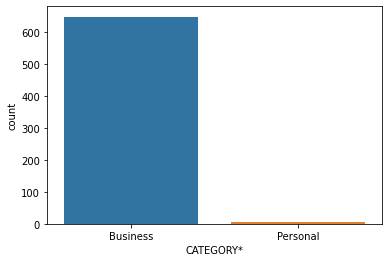

In [22]:
sns.countplot(x='CATEGORY*', data =df)

Most of the customers are using Uber as for business use rather than for personal use.

How long do people travel with Uber? (in miles)

<AxesSubplot:ylabel='Frequency'>

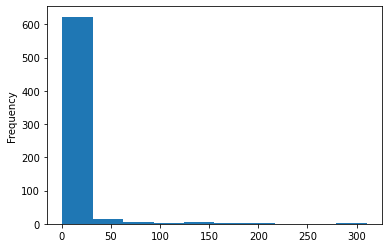

In [23]:
df['MILES*'].plot.hist()

Which hour does people more likely book uber ?

In [25]:
hours = df['START_DATE*'].dt.hour.value_counts()

Text(0.5, 1.0, 'Number of Trips vs Hours')

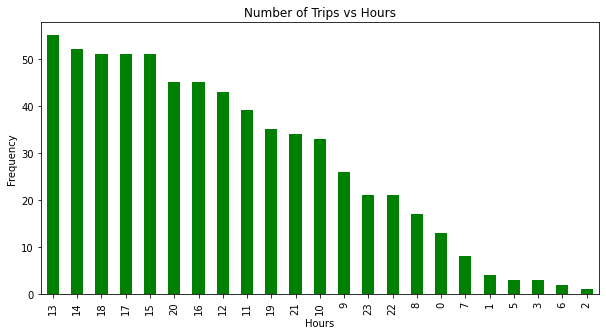

In [35]:
hours.plot(kind = 'bar', color = 'green', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')

Purpose of trip

<AxesSubplot:>

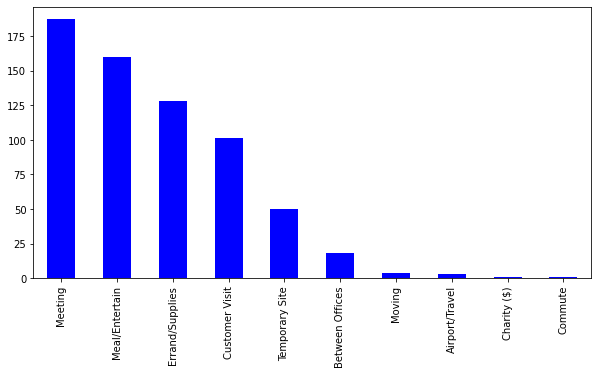

In [38]:
df['PURPOSE*'].value_counts().plot(kind = 'bar', color = 'blue' , figsize = (10,5))

Mostly the purpose of the trip is meetings followed by the rest.

Highest tips in a day

<AxesSubplot:>

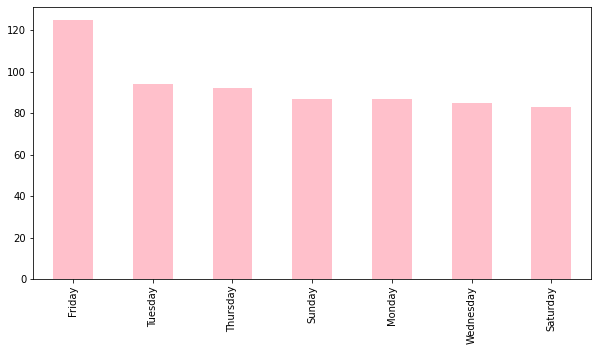

In [39]:
df['WEEKDAY'].value_counts().plot(kind = 'bar', color = 'pink', figsize = (10,5))

From above figure we can say that the day with the highest trips done is Friday. So now we can find the number of trips each day

<AxesSubplot:>

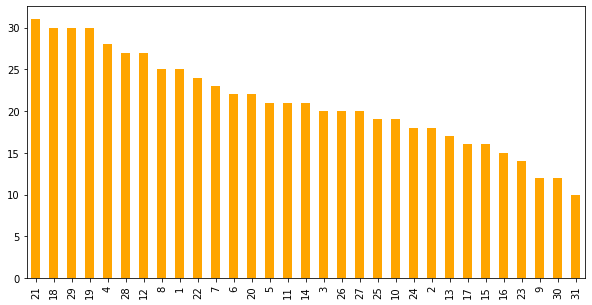

In [40]:
df['DAY'].value_counts().plot(kind = 'bar', color = 'orange', figsize = (10,5))

Finding which month is the trips booked the most

<AxesSubplot:>

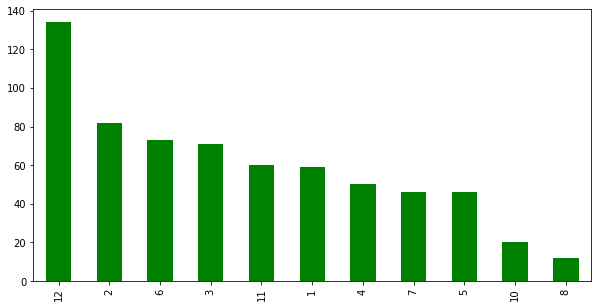

In [41]:
df['MONTH'].value_counts().plot(kind = 'bar', color = 'green', figsize = (10,5))

Now we will find the starting and ending points of the trips done by the customers

<AxesSubplot:>

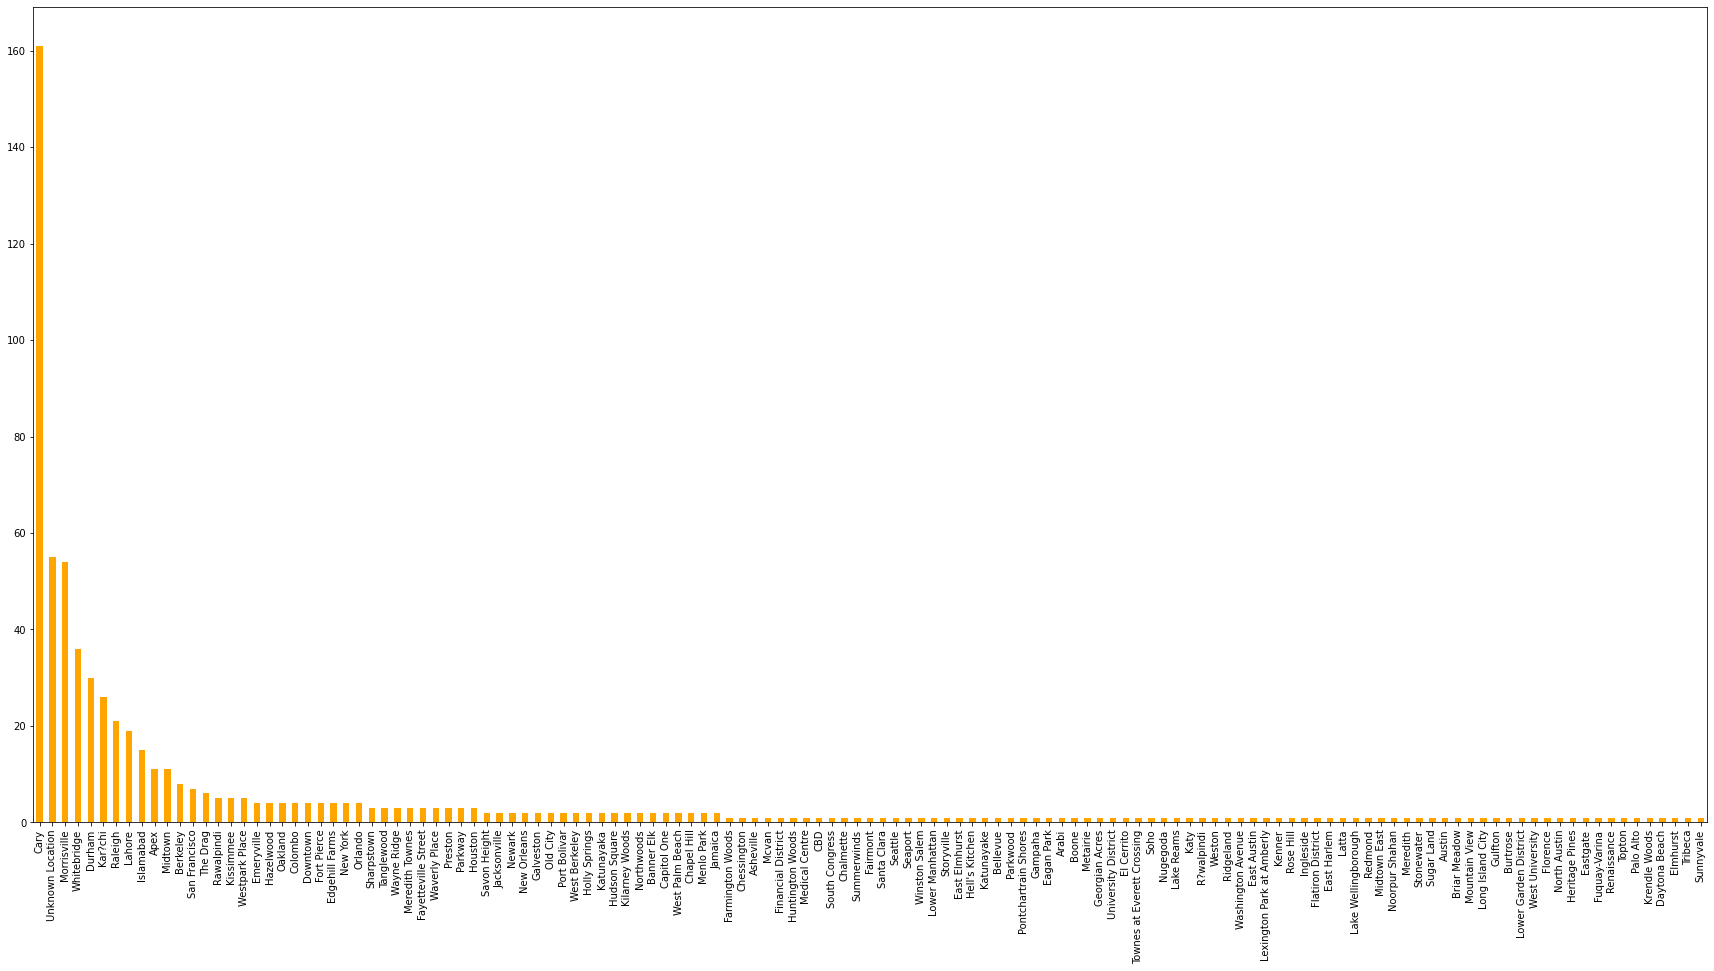

In [44]:
df['START*'].value_counts().plot(kind = 'bar', color = 'orange', figsize = (30,15))

From the above figure we can say that the trips held mostly starting from Curry. 

<AxesSubplot:>

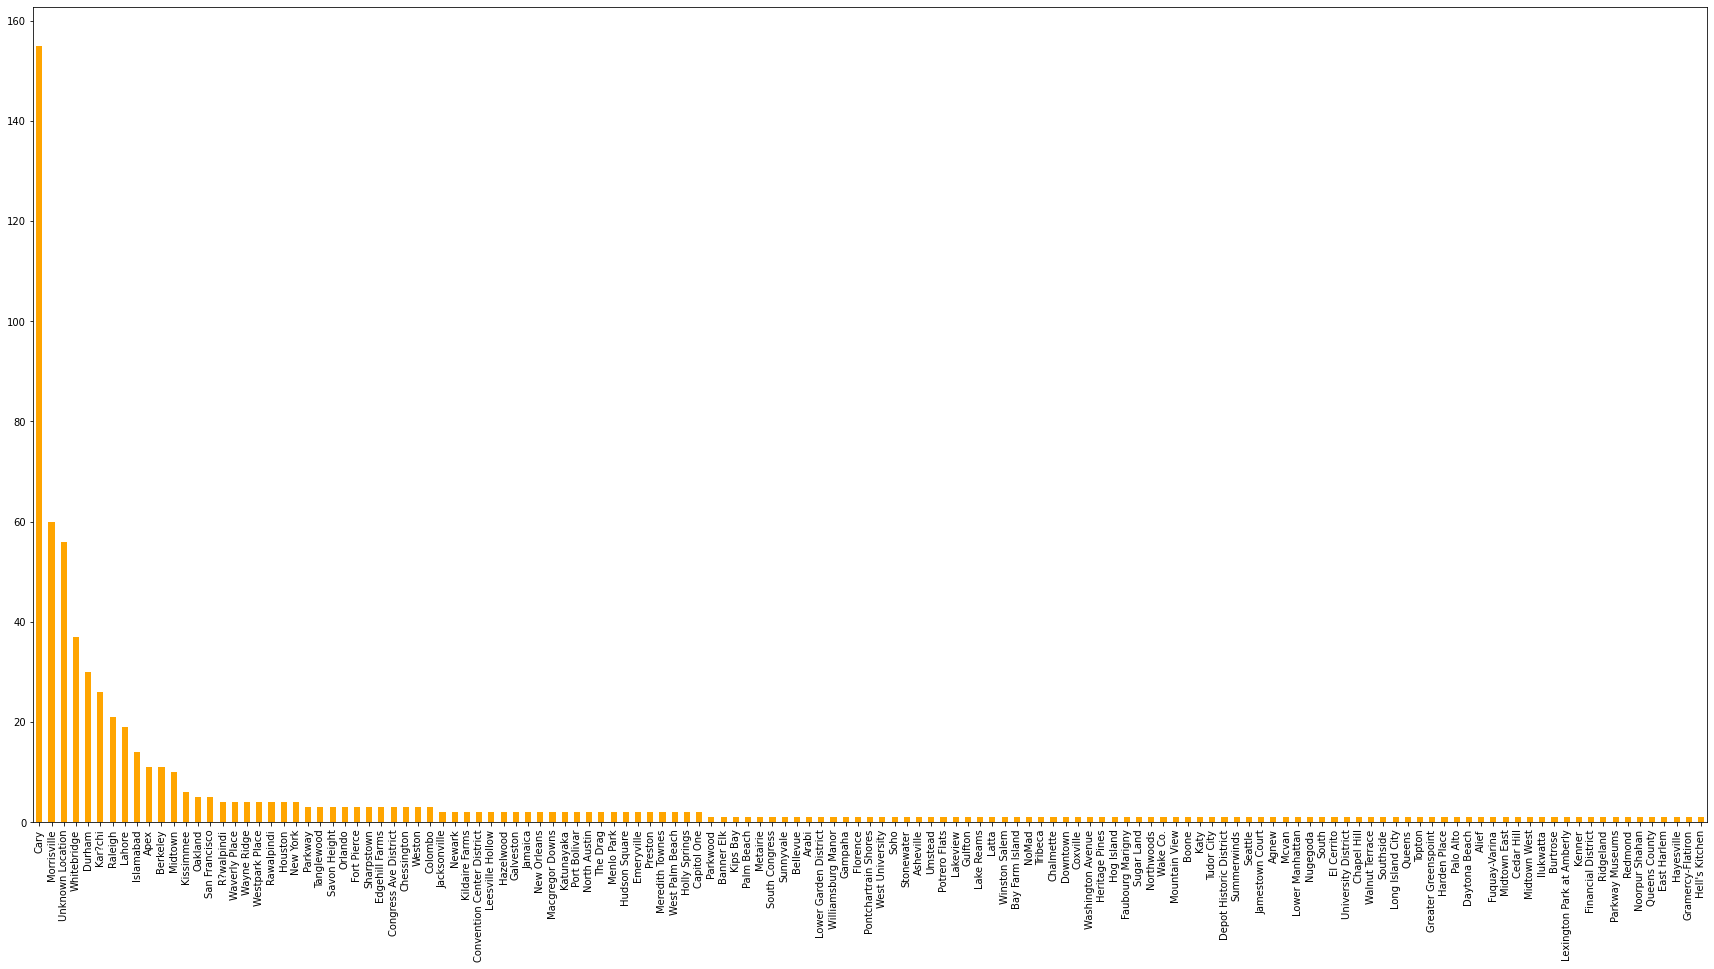

In [47]:
df['STOP*'].value_counts().plot(kind = 'bar', color = 'orange', figsize = (30,15))